In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 多項式回帰
### 訓練データ生成

In [2]:
# パラメータ設定
n_samples = 10
var = .25

In [3]:
def sin_func(x):
    """ sin波のデータ作成 """
    return np.sin(2 * np.pi * x) 

In [5]:
def add_noise(y_true: np.ndarray, var: float) -> np.ndarray:
    """ 正規分布に従うノイズを追加する """
    noise = np.random.normal(scale=var, size=y_true.shape)  # scale : 標準偏差
    y_noise = y_true + noise
    return y_noise

In [6]:
xs = np.linspace(0, 1, n_samples)
ys_true = sin_func(xs)
ys = add_noise(ys_true, var)

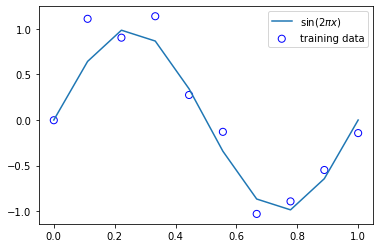

In [7]:
plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
plt.legend()
plt.show()

### 学習
求める回帰係数 $\hat{w}$ は以下の式となる。 <br/>
$\hat{w} = \left( \Phi^{\mathrm{T}} \Phi \right)^{-1}  \Phi^{\mathrm{T}} y$

In [8]:
def polynomial_features(xs, degree=3):
    """
    入力されたNumpy配列を多項式特徴ベクトルΦに変換
    X = [[1, x1, x1^2, x1^3],
           [1, x2, x2^2, x2^3],
           ...                             
           [1, xn, xn^2, xn^3]]
    """
    X = np.ones((len(xs), degree + 1))  # すべての要素が1の行列を作成
    X_t = X.T
    
    for i in range(1, degree + 1):
        X_t[i] = X_t[i - 1] * xs
        
    return X_t.T

In [9]:
def regression_coefficient(phi: np.ndarray, ys: np.ndarray) -> np.ndarray:
    """ 回帰係数wを求める"""
    tmp = np.dot(phi.T, phi)
    tmp = np.linalg.inv(tmp)
    tmp = np.dot(tmp, phi.T)
    result = np.dot(tmp, ys)
    return result

In [10]:
phi = polynomial_features(xs)
w = regression_coefficient(phi, ys)

In [11]:
print(w)

[  0.07720219  10.89801248 -32.52172005  21.54496482]


### 予測
上で求めた $\hat{w}$ を使用して、 $y_{pred} = \hat{w} \phi(x) \  (y(x) = \Phi \hat{w})$ で $y_{pred}$ を予測する。

In [12]:
ys_pred = np.dot(phi, w)

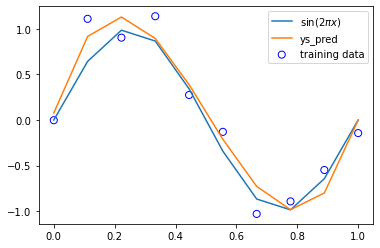

In [13]:
plt.scatter(xs, ys, facecolor='none', edgecolor='b', s=50, label='training data')
plt.plot(xs, ys_true, label='$\sin(2\pi x)$')
plt.plot(xs, ys_pred, label='ys_pred')
plt.legend()
plt.show()

## 重回帰分析
### 訓練データ生成（三次元入力）

In [14]:
np.random.random((10, 3))  # 10行3列で0以上1未満の乱数を作成

array([[0.39404071, 0.57362868, 0.49999827],
       [0.25154121, 0.48255909, 0.49921166],
       [0.8718176 , 0.39665456, 0.67173112],
       [0.64775108, 0.00314152, 0.49471379],
       [0.70575627, 0.47981821, 0.36532646],
       [0.92458302, 0.05416779, 0.64750213],
       [0.19278207, 0.66130172, 0.1238537 ],
       [0.16856731, 0.66114487, 0.92203287],
       [0.57564288, 0.38669516, 0.86565117],
       [0.26103269, 0.40284461, 0.63035981]])

In [15]:
n_sample = 100
var = .2
x_dim = 3

In [16]:
def mul_linear_func(x: np.ndarray) -> np.ndarray:
    """ y = 1.0 + 0.5*X_0 + 2*X_0 + X_0 """
    ww = [1., 0.5, 2., 1.]
    return ww[0] + ww[1] * x[:, 0] + ww[2] * x[:, 1] + ww[3] * x[:, 2]

In [17]:
def add_noise(y_true: np.ndarray, var: float) -> np.ndarray:
    return y_true + np.random.normal(scale=var, size=y_true.shape)

In [18]:
X = np.random.random((n_sample, x_dim))
ys_true = mul_linear_func(X)
ys = add_noise(ys_true, var)

In [19]:
print(X.shape)
print(ys.shape)

(100, 3)
(100,)


In [20]:
X[:3]

array([[0.84874366, 0.21803964, 0.86502794],
       [0.47007607, 0.01807417, 0.90973335],
       [0.66860081, 0.6360021 , 0.59108856]])

### 学習
求める回帰係数 $w$ は以下のように書ける。 <br/>
$\hat{w} = \left( X^{\mathrm{T}} X \right)^{-1}  X^{\mathrm{T}} y$

In [21]:
def add_one(X: np.ndarray) -> np.ndarray:
    """ 行列Xの1列目に全て1の列を追加する """
    ones = np.ones(len(X))[:, None]
    added_X = np.concatenate([ones, X], axis=1)
    return added_X

In [22]:
X_train = add_one(X)  # Xに1の列を追加する

In [23]:
X_train[:3]  # 1の列が追加されていることを確認

array([[1.        , 0.84874366, 0.21803964, 0.86502794],
       [1.        , 0.47007607, 0.01807417, 0.90973335],
       [1.        , 0.66860081, 0.6360021 , 0.59108856]])

In [24]:
# 公式にならって w を求める
tmp = np.dot(X_train.T, X_train)
tmp = np.linalg.inv(tmp)
tmp = np.dot(tmp, X_train.T)
w = np.dot(tmp, ys)

In [25]:
print(w)

[1.08568573 0.44632806 1.94997296 0.97025163]


### 予測
入力に対する値を $y(x) = \hat{w}^{\mathrm{T}}  x \ (y = X\hat{w})$ で予測する

In [27]:
w_true = [1., 0.5, 2., 1.]  # 正解のwの値

In [28]:
for i in range(len(w)):
    print("w{0}_true: {1:>5.2}   w{0}_estimated: {2:>5.2}".format(i, w_true[i], w[i]))

w0_true:   1.0   w0_estimated:   1.1
w1_true:   0.5   w1_estimated:  0.45
w2_true:   2.0   w2_estimated:   1.9
w3_true:   1.0   w3_estimated:  0.97
